In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

In [2]:
historical_data = pd.read_csv('HistoricalEsportData.csv', encoding='cp1252')
general_data = pd.read_csv('GeneralEsportData.csv', encoding='cp1252')

In [3]:
historical_data.head()

,Date,Game,Earnings,Players,Tournaments
0,1998-01-01,QuakeWorld,15000.0,8,1
1,1998-05-01,Quake II,14600.0,4,1
2,1998-07-01,Quake II,15000.0,5,1
3,1998-07-01,QuakeWorld,6500.0,4,1
4,1998-11-01,Quake II,36600.0,13,2


In [4]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6387 non-null   object 
 1   Game         6387 non-null   object 
 2   Earnings     6387 non-null   float64
 3   Players      6387 non-null   int64  
 4   Tournaments  6387 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 249.6+ KB


In [5]:
general_data.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,190075.61,33235.72,246,95
1,Age of Empires II,1999,Strategy,1629065.26,1011400.39,1064,663
2,Age of Empires III,2005,Strategy,68113.85,26613.85,106,76
3,Age of Empires Online,2011,Strategy,3294.56,3294.56,16,8
4,Age of Mythology,2002,Strategy,52360.00,360.00,22,6


In [6]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              512 non-null    object 
 1   ReleaseDate       512 non-null    int64  
 2   Genre             512 non-null    object 
 3   TotalEarnings     512 non-null    float64
 4   OnlineEarnings    512 non-null    float64
 5   TotalPlayers      512 non-null    int64  
 6   TotalTournaments  512 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
from datetime import datetime
historical_data['Year'] = historical_data['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').strftime('%Y'))
historical_data.head()

,Date,Game,Earnings,Players,Tournaments,Year
0,1998-01-01,QuakeWorld,15000.0,8,1,1998
1,1998-05-01,Quake II,14600.0,4,1,1998
2,1998-07-01,Quake II,15000.0,5,1,1998
3,1998-07-01,QuakeWorld,6500.0,4,1,1998
4,1998-11-01,Quake II,36600.0,13,2,1998


In [8]:
df_earnings = historical_data.groupby(['Year','Game'])['Earnings'].sum().unstack(level=0, fill_value=0)
df_earnings

Year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Game,,,,,,,,,,,,,,,,,,,,,
ARMS,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,3257.10,13297.14,1643.85,50.00
Acceleration of SUGURI 2,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,210.00,100.00
Age of Empires,2000.0,0.0,9500.0,0.00,100.0,625.00,0.0,0.00,289.25,0.0,...,3727.63,0.00,1716.00,3740.00,12939.00,62321.80,27588.21,41426.72,10960.00,11954.00
Age of Empires II,0.0,0.0,113768.3,160541.29,92866.0,27697.02,45565.2,40816.91,25332.54,21077.9,...,10458.41,24642.94,33280.27,54308.71,203086.83,51346.14,97988.43,65642.33,137539.31,377411.78
Age of Empires III,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,20000.0,...,0.00,345.00,2145.85,0.00,1995.00,2120.00,3300.00,3550.00,9035.00,8123.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chess24,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1184696.09
iRacing.com,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,48900.00,32500.00,32000.00,30500.00,39694.67,47319.88,50889.99,143340.30,399642.94,661161.65
osu!,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,5000.00,6220.00,7560.00,4320.00,12360.00,3000.00


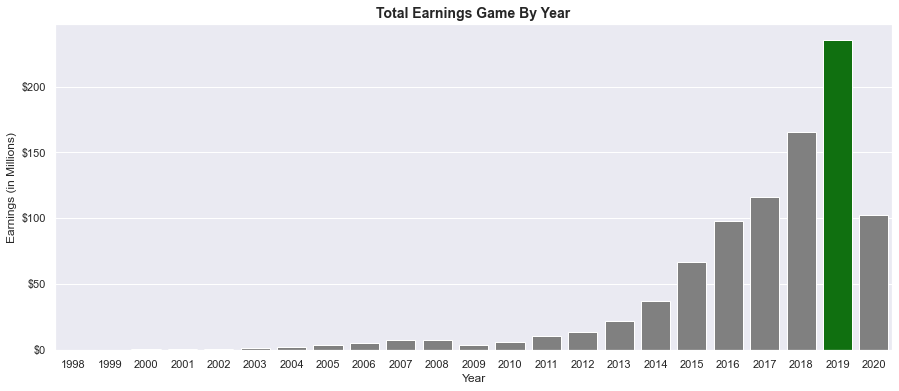

In [24]:
from matplotlib.ticker import FuncFormatter

total_earnings = df_earnings.sum()
fig, ax = plt.subplots(figsize=(15,6))
clr1 = ['grey' if (x < max(total_earnings)) else 'green' for x in total_earnings]
sns.barplot(x=total_earnings.index, y=total_earnings, palette=clr1, ax=ax)
ax.set_title('Total Earnings Game By Year', fontsize=14, fontweight='bold')
formatter = FuncFormatter(lambda y, pos: '$%.0f' % (y*1e-6))
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Earnings (in Millions)')
plt.show()

In [9]:
top_data = list([col, df_earnings[col].idxmax(), df_earnings[col].max()] for col in df_earnings.columns)
earnings_by_year = pd.DataFrame(top_data, columns=['Year', 'Game', 'MaxEarnings'])
earnings_by_year

,Year,Game,MaxEarnings
0,1998,Quake II,66200.00
1,1999,StarCraft: Brood War,139553.84
2,2000,Quake III Arena,415237.82
3,2001,Counter-Strike,346592.44
4,2002,Counter-Strike,400994.88
5,2003,Counter-Strike,819377.99
6,2004,Counter-Strike,899651.67
7,2005,Counter-Strike,1353441.43
8,2006,Counter-Strike,2131599.40
9,2007,Counter-Strike,1631004.94


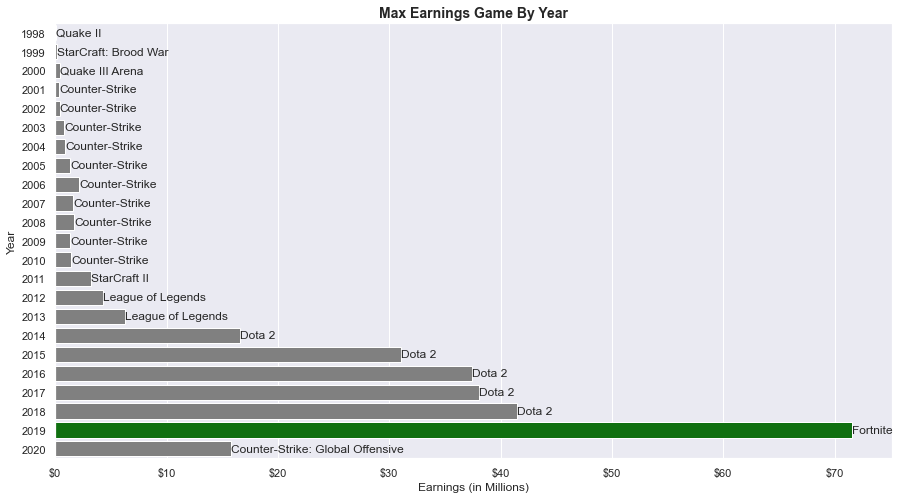

In [44]:
fig, ax = plt.subplots(figsize=(15,8))
clr1 = ['grey' if (y < max(earnings_by_year['MaxEarnings'])) else 'green' for y in earnings_by_year['MaxEarnings']]
sns.barplot(data=earnings_by_year, x='MaxEarnings', y='Year', palette=clr1, ax=ax)
for p, game in zip(ax.patches, earnings_by_year['Game'].tolist()):
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2,
            game, ha='left', va='center')
ax.set_title('Max Earnings Game By Year', fontsize=14, fontweight='bold')
formatter = FuncFormatter(lambda x, pos: '$%.0f' % (x*1e-6))
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Earnings (in Millions)')
plt.show()

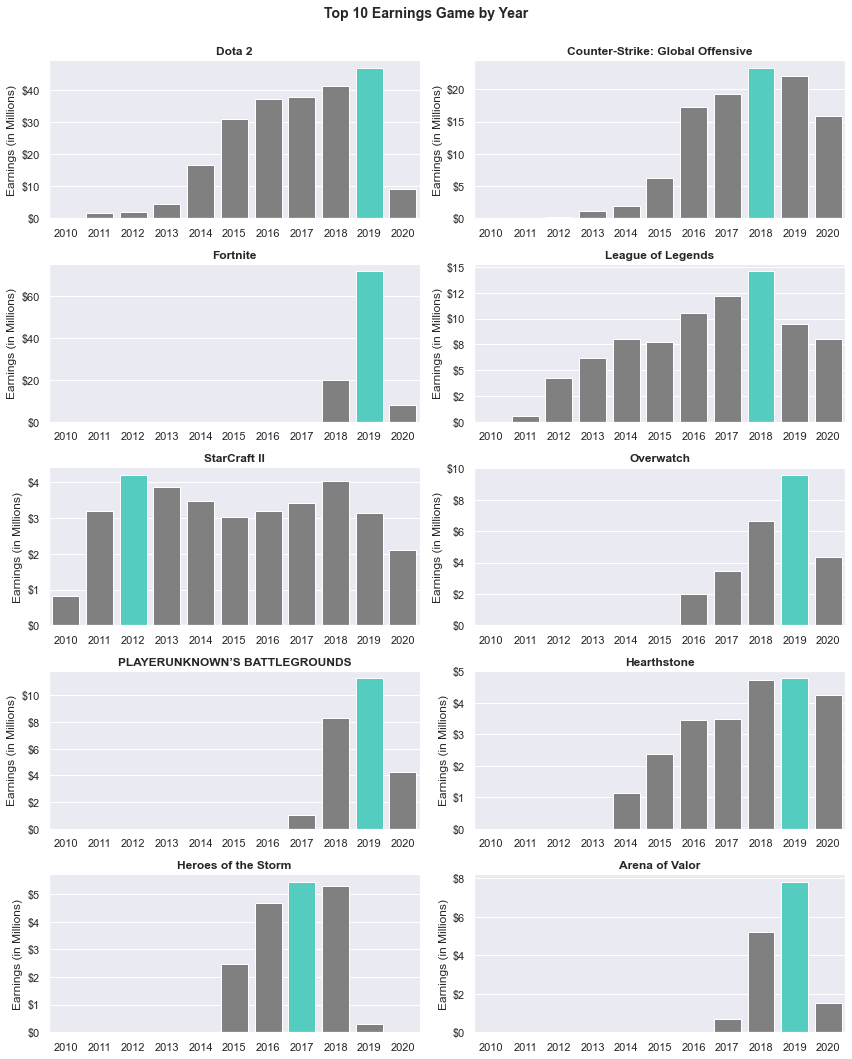

In [11]:
top10 = df_earnings.sum(axis=1).sort_values(ascending=False)[:10].index
earnings_top10 = df_earnings.loc[top10,'2010':].T

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,15))
fig.suptitle('Top 10 Earnings Game by Year', fontsize=14, fontweight='bold')
for col, ax in zip(earnings_top10.columns, axes.flatten()):
    clr2 = ['grey' if (x < max(earnings_top10[col])) else 'turquoise' for x in earnings_top10[col]]
    sns.barplot(x=earnings_top10.index, y=earnings_top10[col], palette=clr2, ax=ax)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    formatter = FuncFormatter(lambda y, pos: '$%.0f' % (y*1e-6))
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Earnings (in Millions)')

fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

In [12]:
df_plays = historical_data.groupby(['Year','Game'])[['Players','Tournaments']] \
            .agg({'Players':np.max, 'Tournaments':np.sum})
df_plays

Players  Tournaments
Year Game                                      
1998 Age of Empires              1            1
     Quake II                   13            4
     QuakeWorld                  8            3
     StarCraft: Brood War        8            1
1999 Descent 3                   1            1
...                            ...          ...
2020 Zwift                       6            2
     chess24                    27           10
     iRacing.com               117           33
     osu!                       48            1
     rFactor 2                  27           19

[1468 rows x 2 columns]

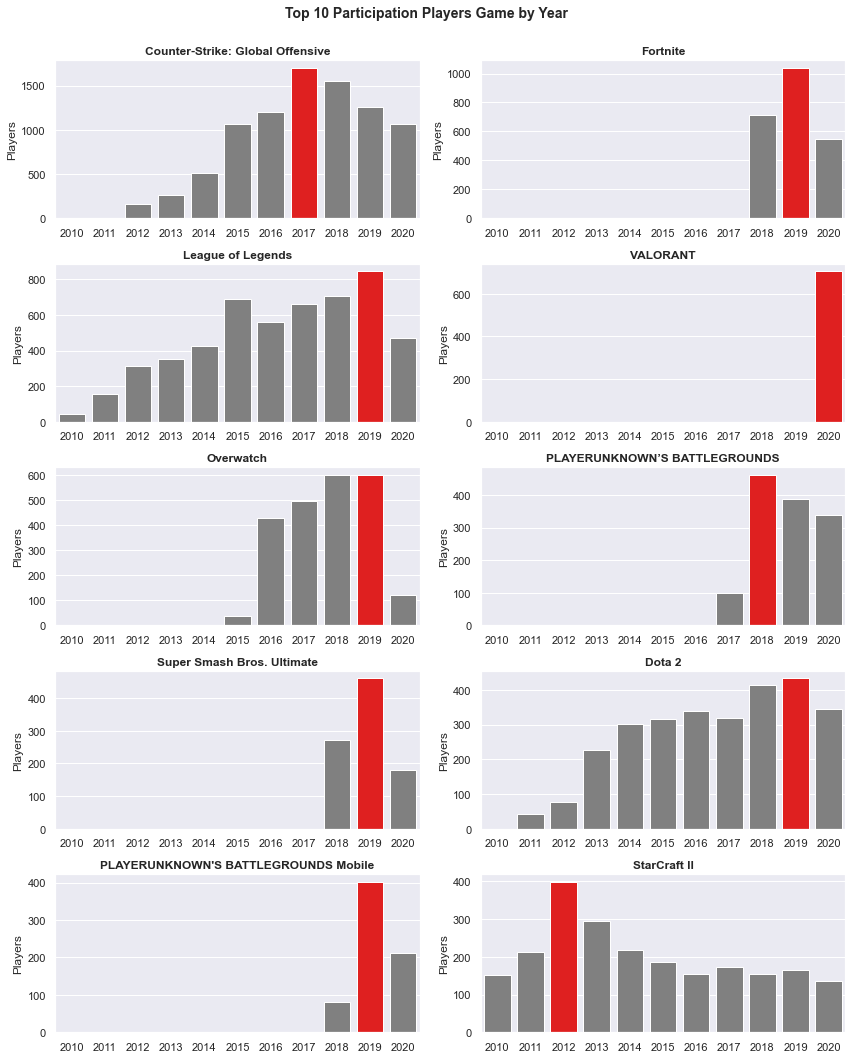

In [13]:
players = df_plays.unstack(0, fill_value=0)['Players']
top10_players = players.max(axis=1).sort_values(ascending=False)[:10].index
players = players.loc[top10_players, '2010':].T

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,15))
fig.suptitle('Top 10 Participation Players Game by Year', fontsize=14, fontweight='bold')
for col, ax in zip(players.columns, axes.flatten()):
    clr3 = ['grey' if (x < max(players[col])) else 'red' for x in players[col]]
    sns.barplot(x=players.index, y=players[col], palette=clr3, ax=ax)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Players')

fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

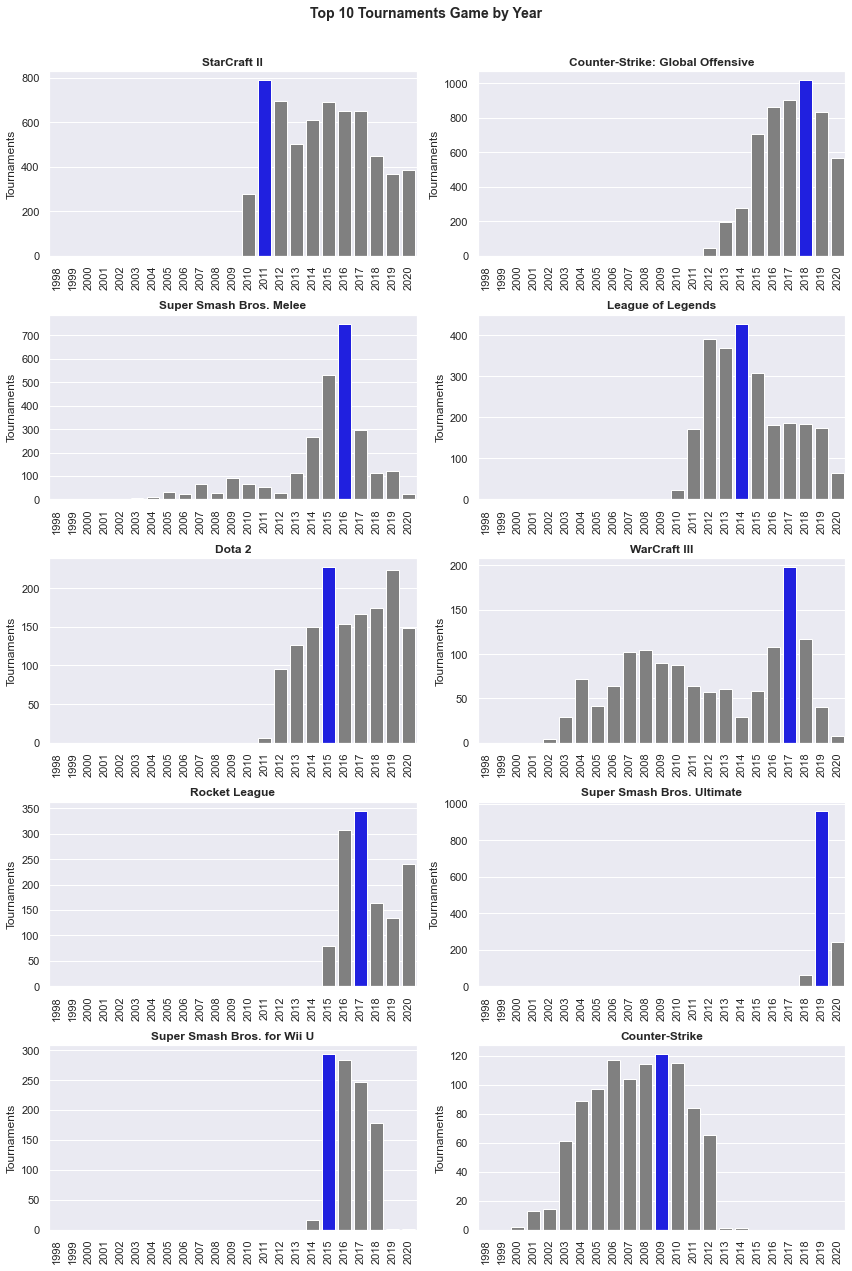

In [14]:
tournaments = df_plays.unstack(0, fill_value=0)['Tournaments']
top10_tours = tournaments.sum(axis=1).sort_values(ascending=False)[:10].index
tournaments = tournaments.loc[top10_tours].T

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,18))
fig.suptitle('Top 10 Tournaments Game by Year', fontsize=14, fontweight='bold')
for col, ax in zip(tournaments.columns, axes.flatten()):
    clr4 = ['grey' if (x < max(tournaments[col])) else 'blue' for x in tournaments[col]]
    sns.barplot(x=tournaments.index, y=tournaments[col], palette=clr4, ax=ax)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel('')
    ax.set_ylabel('Tournaments')

fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

In [15]:
temp = []
for game in general_data['Game'].unique():
    if game not in historical_data['Game'].unique():
        temp.append(game)

np.array(sorted(temp))

array(['Battlefield 1', 'Battlefield 5', 'Brawlout',
       'Call of Duty: Mobile', 'Dofus', 'Dream league Soccer',
       'Echo Arena', 'Endgods', 'FIFA 21', 'Gray Basin',
       'Guitar Hero: World Tour', 'Halo: Infinite', 'Iron Harvest',
       'Ironsight', 'Islands of Nyne', 'Mobile Legends: Bang Bang',
       'NBA 2K Online', 'NBA 2K19', 'NHL 17', 'Pac-man',
       'Pok<U+00E9>mon TCG', 'Pro Evolution Soccer 2013',
       'Rules Of Survival', 'Shardbound', 'Soccer Stars', 'Sudden Attack',
       'Teeworlds', 'TowerFall: Ascension', 'Trackmania United Forever',
       'Trials Fusion', 'Warhammer 40,000: Dawn of War II'], dtype='<U32')

In [16]:
general_data = general_data.loc[~general_data['Game'].isin(temp)].reset_index(drop=True)
general_data.shape

(481, 7)

In [17]:
general_data.sort_values(by='ReleaseDate')[:10]

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
458,Tetris,1989,Puzzle Game,26426.38,10926.38,39,9
304,Teenage Mutant Ninja Turtles: Tournament Fighters,1993,Fighting Game,820.00,0.00,7,2
416,NHL '94,1993,Sports,3818.56,0.00,25,8
87,Doom II: Hell on Earth,1994,First-Person Shooter,4680.00,2480.00,11,6
41,Windjammers,1994,Strategy,4172.16,40.00,32,11
299,Super Street Fighter II Turbo,1994,Fighting Game,23678.05,0.00,104,44
204,Fighter's History Dynamite,1994,Fighting Game,195.00,0.00,3,1
265,Sailor Moon S,1995,Fighting Game,3201.19,10.00,18,11
267,Samurai Shodown III,1995,Fighting Game,30.00,30.00,3,1
316,Ultimate Mortal Kombat 3,1995,Fighting Game,150.00,0.00,6,2


In [18]:
df_countgame = general_data.groupby(['ReleaseDate','Genre'])['Game'].count().unstack(fill_value=0)
df_countgame

Genre,Battle Royale,Collectible Card Game,Fighting Game,First-Person Shooter,Multiplayer Online Battle Arena,Puzzle Game,Racing,Role-Playing Game,Sports,Strategy,Third-Person Shooter
ReleaseDate,,,,,,,,,,,
1989,0,0,0,0,0,1,0,0,0,0,0
1993,0,0,1,0,0,0,0,0,1,0,0
1994,0,0,2,1,0,0,0,0,0,1,0
1995,0,0,3,0,0,0,0,0,0,1,0
1996,0,0,1,1,0,1,0,0,0,0,0
1997,0,0,1,1,0,1,0,0,0,1,0
1998,0,0,6,0,0,0,0,0,0,1,0
1999,0,0,6,3,0,0,0,0,2,1,0
2000,0,0,4,1,0,0,0,0,1,1,0


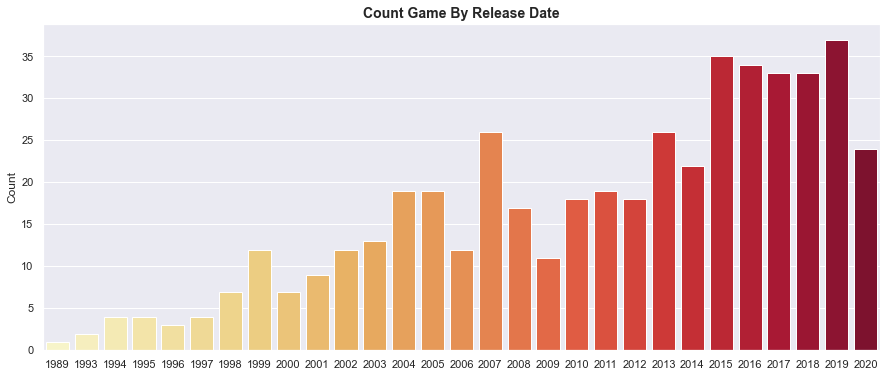

In [19]:
plt.figure(figsize=(15,6))
df_release = df_countgame.sum(axis=1)
sns.barplot(x=df_release.index, y=df_release, palette='YlOrRd')
plt.title('Count Game By Release Date', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

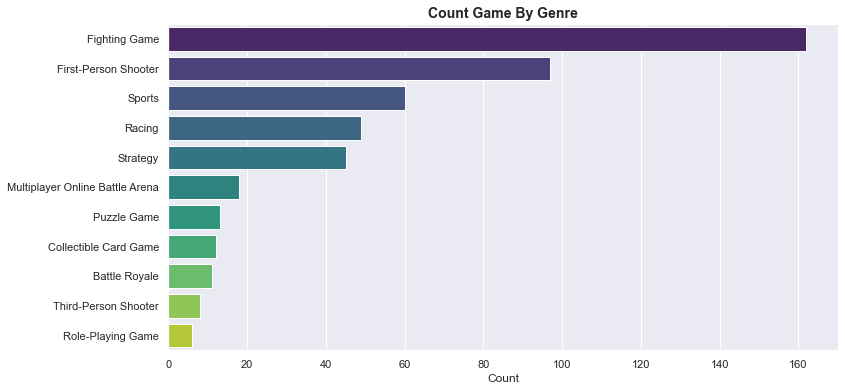

In [20]:
plt.figure(figsize=(12,6))
df_genre = df_countgame.T.sum(axis=1).sort_values(ascending=False)
sns.barplot(x=df_genre, y=df_genre.index, palette='viridis')
plt.title('Count Game By Genre', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

In [21]:
df_game = general_data.iloc[:,[0,3,4,5,6]].set_index('Game')
df_game

,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
Game,,,,
Age of Empires,190075.61,33235.72,246,95
Age of Empires II,1629065.26,1011400.39,1064,663
Age of Empires III,68113.85,26613.85,106,76
Age of Empires Online,3294.56,3294.56,16,8
Age of Mythology,52360.00,360.00,22,6
...,...,...,...,...
Gears of War 3,7255.81,2700.00,13,4
Gears of War 4,3087285.00,32285.00,135,41
Gears of War: Ultimate Edition,170000.00,0.00,39,3


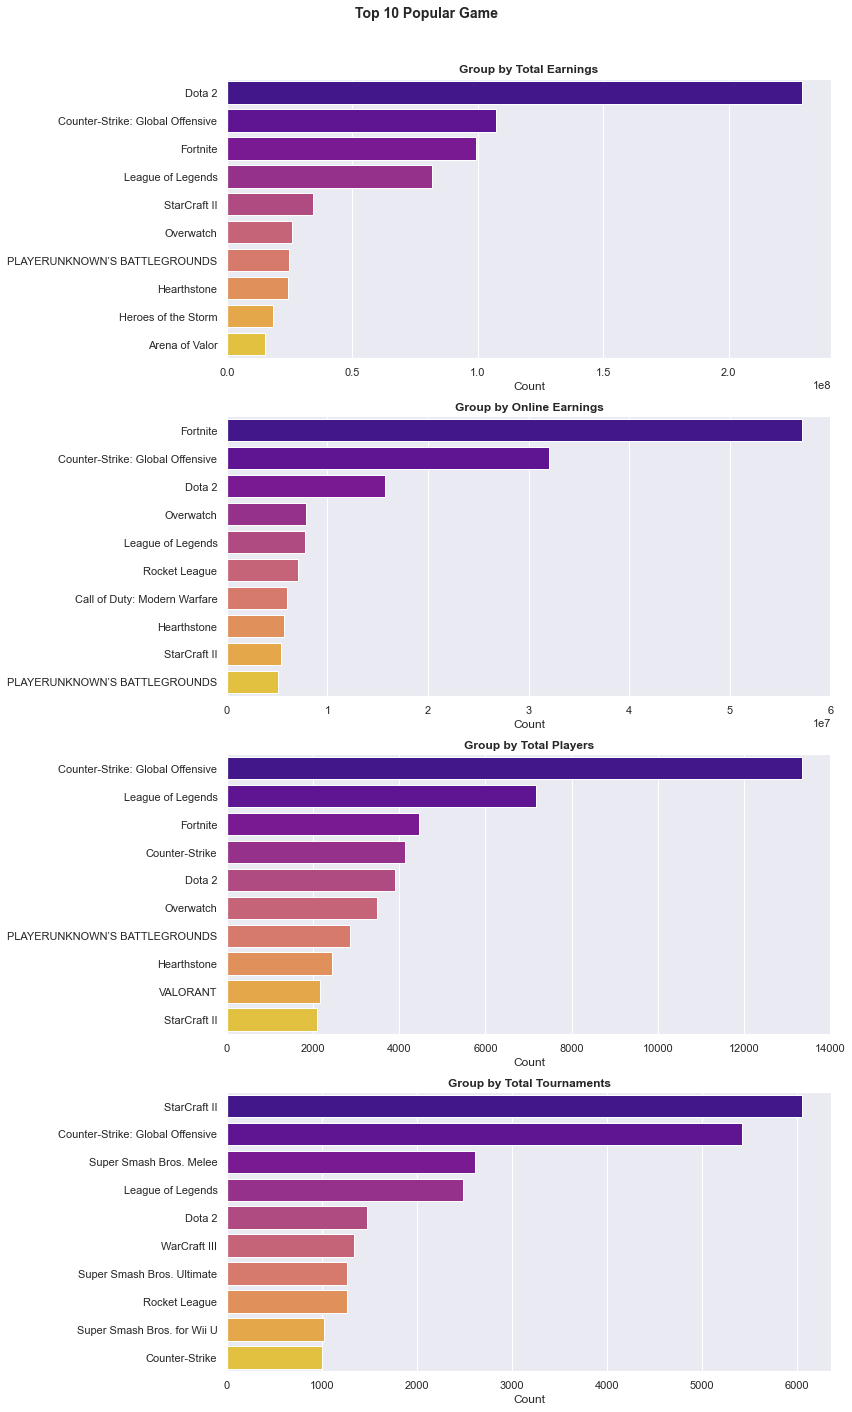

In [22]:
import re
fig, axes = plt.subplots(nrows=len(df_game.columns), figsize=(12,20))
fig.suptitle('Top 10 Popular Game', fontsize=14, fontweight='bold')
for col, ax in zip(df_game.columns, axes):
    top10_sort = df_game.sort_values(by=col, ascending=False)[col][:10]
    sns.barplot(x=top10_sort, y=top10_sort.index, palette='plasma', ax=ax)
    judul = re.sub(r"(\w)([A-Z])", r"\1 \2", col)
    ax.set_title('Group by ' + judul, fontweight='bold')
    ax.set_xlabel('Count')
    ax.set_ylabel('')

plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()